In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

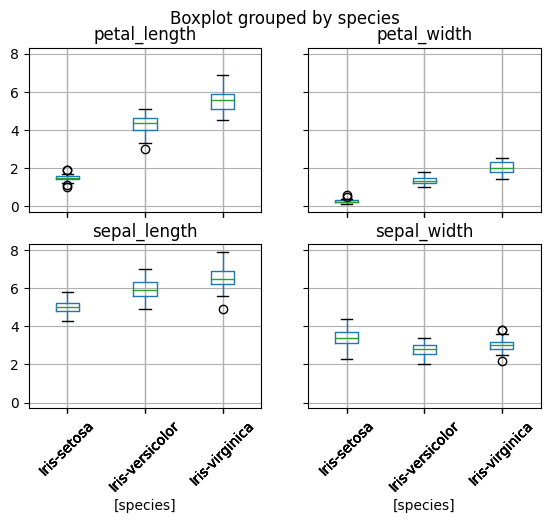

In [56]:
df.boxplot( by = 'species', rot = 45)

### Box plot is drawn to give the rough estimation of distribution of values of species for each feature. From the above box plot ,it seems petal_length and petal_width are good at classifying species because the clusters of the species are mostly seperable

## Drawn pair plot below just to see the relationships of all combinations

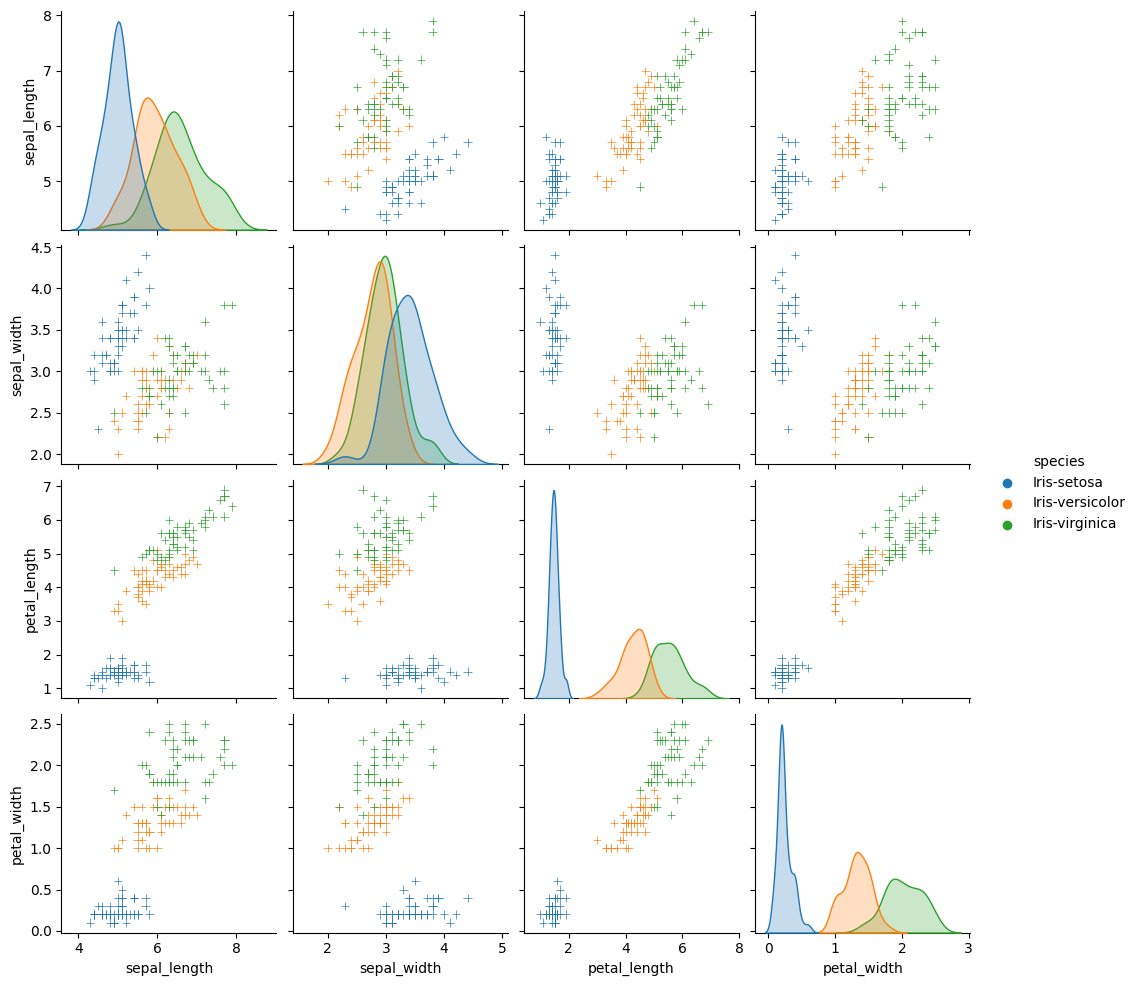

In [10]:
import seaborn as sns
g = sns.pairplot(df, hue='species', markers='+')
plt.show()

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

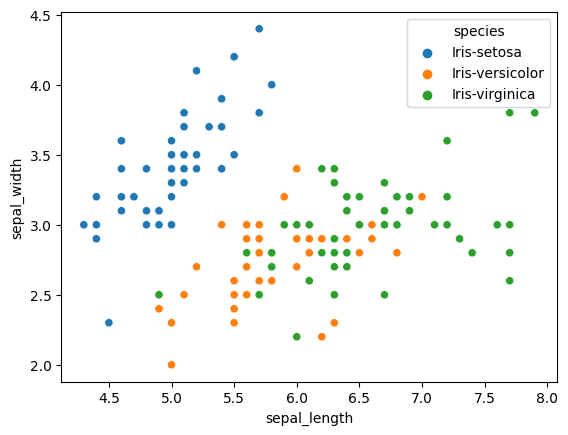

In [79]:
#scatter plot of sepal_length and sepal_width
# df.plot(kind='scatter', x='sepal_length', y='sepal_width',c = 'species', colormap='brg')
import seaborn as sns
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue="species")

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

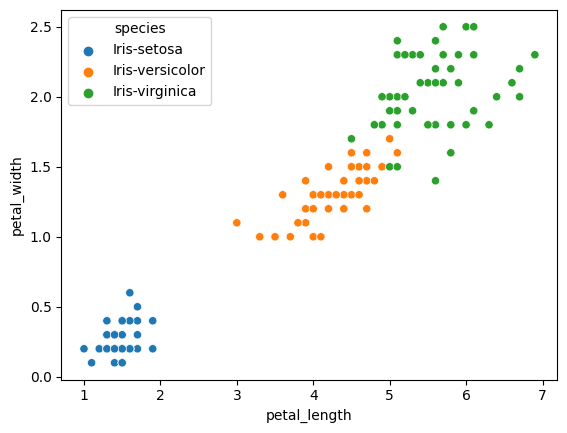

In [80]:
#scatter plot of petal_length and petal_width
import seaborn as sns
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue="species")


### from the above scatter plots also ,it can be seen again that petal_length and petal_width are good at classifying species.
### we can see that Iris-setosa can be classified if  petal_length<=2 which forms our 1st rule. 

### And for Iris-versicolor and Iris-virginica ,for most of the data we can classify but few values are overlapping and there is a conflict for those few values

### checking below how good petal_length and petal_width are in classifying iris_versicolor and iris_virginica


In [96]:
df[df['species'] == 'Iris-versicolor'][['petal_length','petal_width']].describe()

,petal_length,petal_width
count,50.000000,50.000000
mean,4.260000,1.326000
std,0.469911,0.197753
min,3.000000,1.000000
25%,4.000000,1.200000
50%,4.350000,1.300000
75%,4.600000,1.500000
max,5.100000,1.800000


In [97]:
df[df['species'] == 'Iris-virginica'][['petal_length','petal_width']].describe()

,petal_length,petal_width
count,50.000000,50.00000
mean,5.552000,2.02600
std,0.551895,0.27465
min,4.500000,1.40000
25%,5.100000,1.80000
50%,5.550000,2.00000
75%,5.875000,2.30000
max,6.900000,2.50000


### from above we can clearly see that  petal_length<4.5  falls under Iris-Versicolor and petal_length>5.1 falls under Iris-virginica. But for values between  4.5 and 5.1 it is conflicting to see which class it falls under  .

### Done trail and error to choose cutoff between 4.5 and 5.1 incrementally ,got good accuracy by selecting 4.9 as cutoff between those two classes

### Rule 2 - if petal_length<4.9  Iris-versicolor
### Rule 3 - if petal_legnth>4.9 Iris-virgnica

In [112]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    # your code
    if petal_length<2.5:
        return 'Iris-setosa'
    
    if petal_length<4.9:
        return 'Iris-versicolor'
    

    return 'Iris-virginica'

In [113]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9533333333333334


### To improve accuracy, i tried other method of calculating area using petal length and width .As from scatter plot it is seen that if values of both petal-length and petal_width are increasing , class is moving towards iris_virginica from iris_versicolor, hence it is appropriate to calculate area here using length*width

In [62]:
df["petal_area"] = df['petal_length'] * df['petal_width']

In [64]:
df.groupby("species").petal_area.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.3628,0.183248,0.11,0.2650,0.300,0.42,0.96
Iris-versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
Iris-virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


<AxesSubplot: title={'center': 'petal_area'}, xlabel='species'>

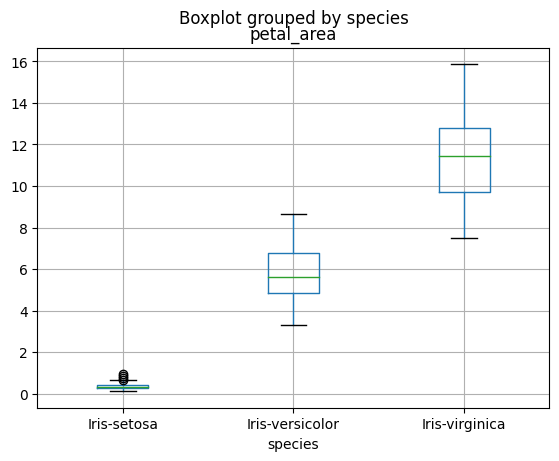

In [65]:
df.boxplot(column="petal_area", by="species")

### from above boxplot it can be seen that if petal_area < 2 ,the species is iri-setosa
### clearly if petal_length<7,species is versicolor and for petal_length>9, the species is iris-virginica
###  For values between 7 and 9, it is conflicting again. 

In [120]:
### checking data for area between  7 and 9 to find cutoff
df1 = df[(df.petal_area > 7) & (df.petal_area < 9)]
df1.sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
86,6.7,3.1,4.7,1.5,Iris-versicolor,7.05
85,6.0,3.4,4.5,1.6,Iris-versicolor,7.20
52,6.9,3.1,4.9,1.5,Iris-versicolor,7.35
72,6.3,2.5,4.9,1.5,Iris-versicolor,7.35
119,6.0,2.2,5.0,1.5,Iris-virginica,7.50
56,6.3,3.3,4.7,1.6,Iris-versicolor,7.52
106,4.9,2.5,4.5,1.7,Iris-virginica,7.65
133,6.3,2.8,5.1,1.5,Iris-virginica,7.65
134,6.1,2.6,5.6,1.4,Iris-virginica,7.84
83,6.0,2.7,5.1,1.6,Iris-versicolor,8.16


### After trail and error,i chose 7.5 as it gave me good accuracy much better compared to previous method

In [117]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    petal_area  = petal_length * petal_width
    
    if petal_area < 2:
        return 'Iris-setosa'
    elif petal_area < 7.5:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'
        

In [118]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9733333333333334
